## IS-4100: Web Scraping NFL Draft Data

## Overview:
In this lab, you will learn how to gather NFL draft and scouting data from various websites through web scraping, perform exploratory data analysis (EDA), and build a machine learning model to predict player success in the NFL. You will use **Python / R**, with libraries such as **BeautifulSoup**, **RSelenium**, and **requests** for scraping, **pandas** (Python) or **dplyr** and **tidyverse** (R) for data manipulation, and **scikit-learn** (Python) or **caret** (R) for model building.

## Objectives:
- Learn web scraping techniques using Python or R.
- Perform exploratory data analysis (EDA) on NFL draft data.
- Build a predictive model to analyze draft data and predict player success (e.g., Pro Bowl appearances, number of career games, or player performance ratings).
- Evaluate the model's performance and analyze its implications.

## Instructions:

### Part 1: Web Scraping NFL Draft Data
**Task**: Write a script to scrape NFL draft data. You may use Python or R for this task. Suggested websites include:
- Pro Football Reference (NFL Draft)
- NFL Scouting Data

**For Python**:
- Use libraries such as `BeautifulSoup`, `requests`, and `lxml`.
- Example: Scraping player data using `BeautifulSoup` and cleaning it with `pandas`.

**For R**:
- Use libraries such as `rvest`, `RSelenium`, and `xml2`.
- Example: Scraping player data with `rvest` and cleaning it with `dplyr`.

You are expected to scrape the following information for at least one NFL draft year:
- Player name
- Position
- College
- Draft round and pick number
- NFL team

**Deliverables**:
- A cleaned `pandas` DataFrame (Python) or a cleaned `tibble` (R) containing the scraped data.
- Save the data to a `.csv` file for further analysis.

### Part 2: Exploratory Data Analysis (EDA)
**Task**: Perform an EDA on the scraped NFL draft data. Analyze the following:
- Distribution of players by position.
- Number of players drafted by round.
- Success metrics like Pro Bowl appearances, number of games played, or All-Pro selections (if available).

**Questions to Explore**:
- Are certain positions more frequently drafted in the early rounds?
- Which colleges or conferences have the highest number of players drafted?

**For Python**:
- Use `pandas` and `matplotlib` or `seaborn` for visualizations.

**For R**:
- Use `ggplot2` for visualizations and `dplyr` for data manipulation.

**Deliverables**:
- Visualizations (bar charts, histograms, etc.) of your findings.
- Summary statistics (mean, median, mode) for key variables like draft round and "career value".

### Part 3: Predictive Modeling
**Task**: Build a machine learning model to predict player success based on draft data. You may use either Python or R for model building.

- **For Python**:
  - Use `scikit-learn` for model building and evaluation.
  
- **For R**:
  - Use `caret` for model building and evaluation.

**Steps**:
1. Split the data into training and testing sets.
2. Choose an appropriate model (e.g., logistic regression, decision tree, random forest).
3. Train the model and evaluate its performance using appropriate metrics such as accuracy, precision, and recall.

**Deliverables**:
- Model training and evaluation code.
- A brief explanation of the model's performance and potential ways to improve it.

### Part 4: Analysis and Discussion
**Task**: Analyze the results of your model and discuss the implications. Consider the following:
- What features were most important in predicting success?
- How could the model be improved (e.g., by gathering more data or using more advanced techniques)?
- Discuss potential biases in the data (e.g., players from larger schools being favored) and how they might affect the model.

**Deliverables**:
- A short report (2-3 paragraphs) summarizing your analysis and reflections on the results.


In [ ]:
## Load Packages
import pandas as pd
import seaborn as sns
import os.path
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

##**Part 1: Web Scraping NFL Draft Data**

In [ ]:
# Loop through draft years: 2010-2020
draft_py = pd.DataFrame() # Empty df

# for loop -> go through the years
for i in range(2010, 2020 + 1):
  url = 'https://www.pro-football-reference.com/years/' + str(i) + '/draft.htm'
  # pass in url and read in that year's data
  web_data = pd.read_html(url, header = 1)[0]
  # add season col to dataframe
  web_data['season'] = i
  # Add query to filter out 'Tm' in table
  web_data = web_data.query('Tm != "Tm"')
  # Now, we concat to empty df
  draft_py = pd.concat([draft_py, web_data])

  # reset index after loop
  draft_py.reset_index(drop = True, inplace = True)

In [ ]:
# fill in missing values
draft_py.loc[draft_py['DrAV'].isnull(), 'DrAV'] = 0
draft_py.loc[draft_py['AP1'].isnull(), 'AP1'] = 0
draft_py.loc[draft_py['PB'].isnull(), 'PB'] = 0
draft_py.loc[draft_py['St'].isnull(), 'St'] = 0

In [ ]:
# fix some data in  position column
draft_py['Pos'] = draft_py['Pos'].replace('T', 'OT')
draft_py['Pos'] = draft_py['Pos'].replace('NT', 'DT')
draft_py['Pos'] = draft_py['Pos'].replace('DL', 'DT')

In [ ]:
# Rename teams
conditions = [
    (draft_py.Tm == 'SDG'),
    (draft_py.Tm == 'OAK'),
    (draft_py.Tm == 'STL')
]

# Choices
choices = [
    'LAC', 'LVR', 'LAR'
]

# np.select(conditions, choices)
draft_py['Tm'] = np.select(conditions, choices, default = draft_py.Tm)

draft_py = draft_py.astype(
    {
        'Pick': int,
        'Rnd': int,
        'AP1': float,
        'PB': float,
        'St': float,
        'wAV': float,
        'DrAV': float
    }
)

In [ ]:
# Subsetting for cleaned data frame
draft_data = draft_py[['Player', 'Pos', 'College/Univ', 'Rnd', 'Pick', 'Tm']]
draft_data.head()

,Player,Pos,College/Univ,Rnd,Pick,Tm
0,Sam Bradford,QB,Oklahoma,1,1,LAR
1,Ndamukong Suh,DT,Nebraska,1,2,DET
2,Gerald McCoy,DT,Oklahoma,1,3,TAM
3,Trent Williams,OT,Oklahoma,1,4,WAS
4,Eric Berry,DB,Tennessee,1,5,KAN


In [ ]:
# Save to CSV
draft_data = 'draft_data_2010_2023.csv'

##**Part 2: EDA**

In [ ]:
draft_py_use = draft_py[['season', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'AP1', 'PB', 'St', 'wAV', 'DrAV', 'College/Univ']]
draft_py_use.head()

,season,Rnd,Pick,Tm,Player,Pos,AP1,PB,St,wAV,DrAV,College/Univ
0,2010,1,1,LAR,Sam Bradford,QB,0.0,0.0,5.0,44.0,25.0,Oklahoma
1,2010,1,2,DET,Ndamukong Suh,DT,3.0,5.0,12.0,100.0,59.0,Nebraska
2,2010,1,3,TAM,Gerald McCoy,DT,1.0,6.0,10.0,69.0,65.0,Oklahoma
3,2010,1,4,WAS,Trent Williams,OT,3.0,11.0,13.0,99.0,51.0,Oklahoma
4,2010,1,5,KAN,Eric Berry,DB,3.0,5.0,5.0,50.0,50.0,Tennessee


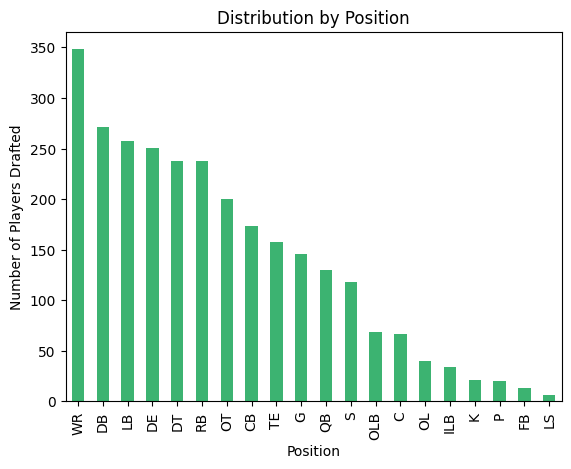

In [ ]:
position_counts = draft_py_use['Pos'].value_counts()
position_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Number of Players Drafted")
plt.show()

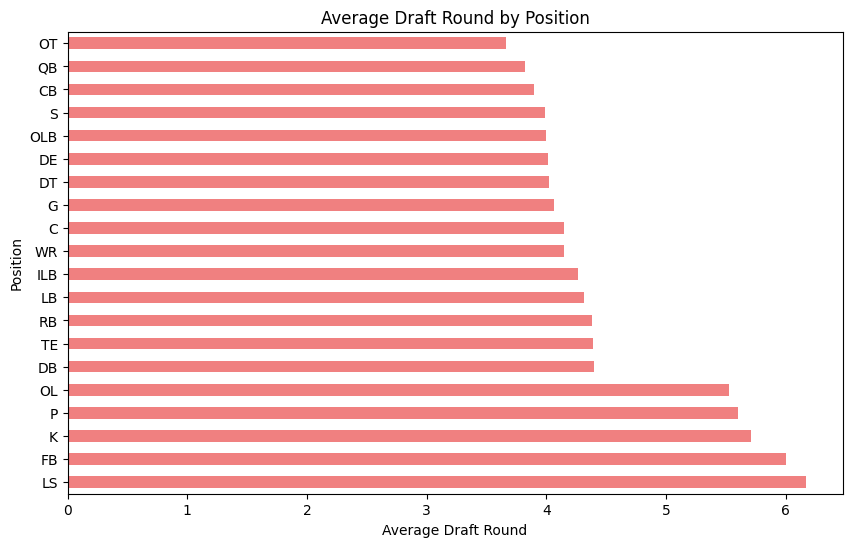

In [ ]:
average_pick_by_position = draft_py_use.groupby('Pos')['Rnd'].mean().sort_values()
plt.figure(figsize=(10, 6))
average_pick_by_position.plot(kind='barh', color='lightcoral')
plt.title("Average Draft Round by Position")
plt.xlabel("Average Draft Round")
plt.ylabel("Position")
plt.gca().invert_yaxis()  # Invert y-axis for ascending
plt.show()

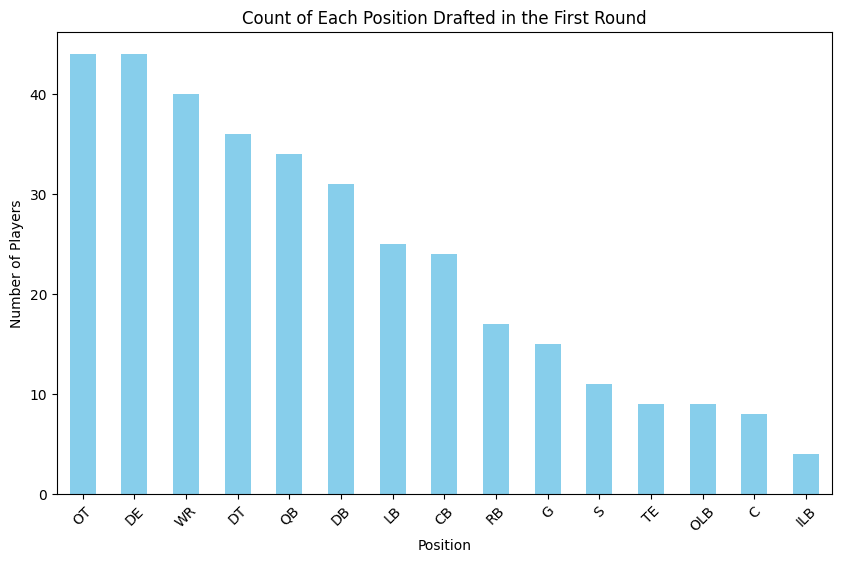

In [ ]:
first_round_counts = draft_py_use[draft_py_use['Rnd'] == 1]['Pos'].value_counts()

plt.figure(figsize=(10, 6))
first_round_counts.plot(kind='bar', color='skyblue')
plt.title("Count of Each Position Drafted in the First Round")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()

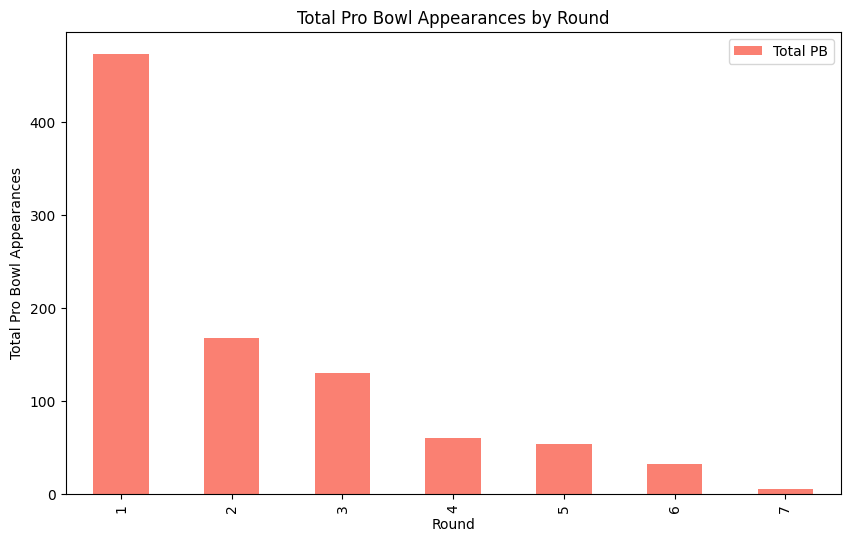

In [ ]:
pb_by_round_total = draft_py_use.groupby('Rnd')['PB'].sum()

plt.figure(figsize=(10, 6))
pb_by_round_total.plot(kind='bar', color='salmon', label='Total PB')
plt.title("Total Pro Bowl Appearances by Round")
plt.xlabel("Round")
plt.ylabel("Total Pro Bowl Appearances")
plt.legend()
plt.show()

In [ ]:
qb_college_counts = draft_py_use[draft_py_use['Pos'] == 'QB'].groupby('College/Univ').size().sort_values(ascending=False)

print(qb_college_counts.head(10))

College/Univ
Oklahoma              5
Alabama               3
USC                   3
Oklahoma St.          3
Northwestern          3
North Carolina St.    3
LSU                   3
Florida St.           3
Iowa                  3
Oregon St.            3
dtype: int64


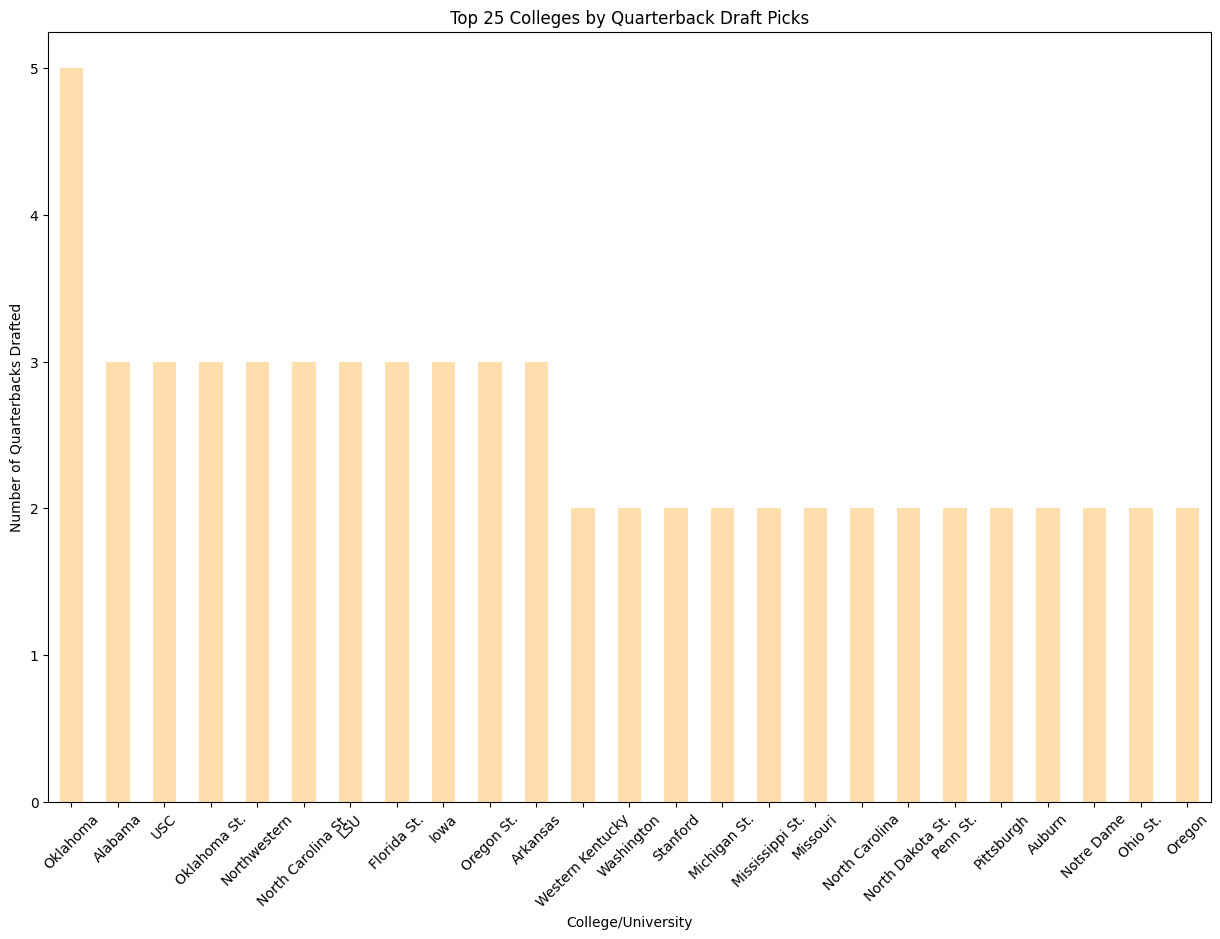

In [ ]:
plt.figure(figsize=(15, 10))
qb_college_counts.head(25).plot(kind='bar', color='navajowhite')
plt.title("Top 25 Colleges by Quarterback Draft Picks")
plt.xlabel("College/University")
plt.ylabel("Number of Quarterbacks Drafted")
plt.xticks(rotation=45)
plt.show()

College/Univ
Alabama        32
Ohio St.       18
LSU            15
Florida        14
Clemson        13
Georgia        11
Florida St.    11
Oklahoma       10
Texas A&M       9
Notre Dame      9
dtype: int64


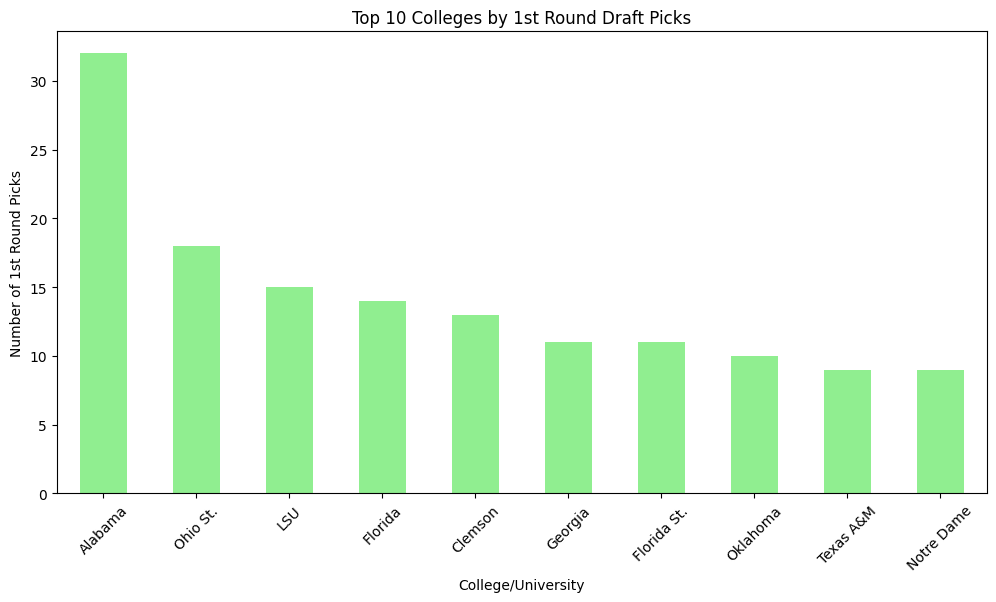

In [ ]:
first_round_college_counts = draft_py_use[draft_py_use['Rnd'] == 1].groupby('College/Univ').size().sort_values(ascending=False)

print(first_round_college_counts.head(10))

plt.figure(figsize=(12, 6))
first_round_college_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Colleges by 1st Round Draft Picks")
plt.xlabel("College/University")
plt.ylabel("Number of 1st Round Picks")
plt.xticks(rotation=45)
plt.show()

College/Univ
Alabama        1620.0
LSU            1206.0
Ohio St.       1072.0
Oklahoma        898.0
Wisconsin       880.0
Georgia         842.0
Clemson         785.0
Florida         766.0
Florida St.     742.0
Notre Dame      726.0
Name: DrAV, dtype: float64


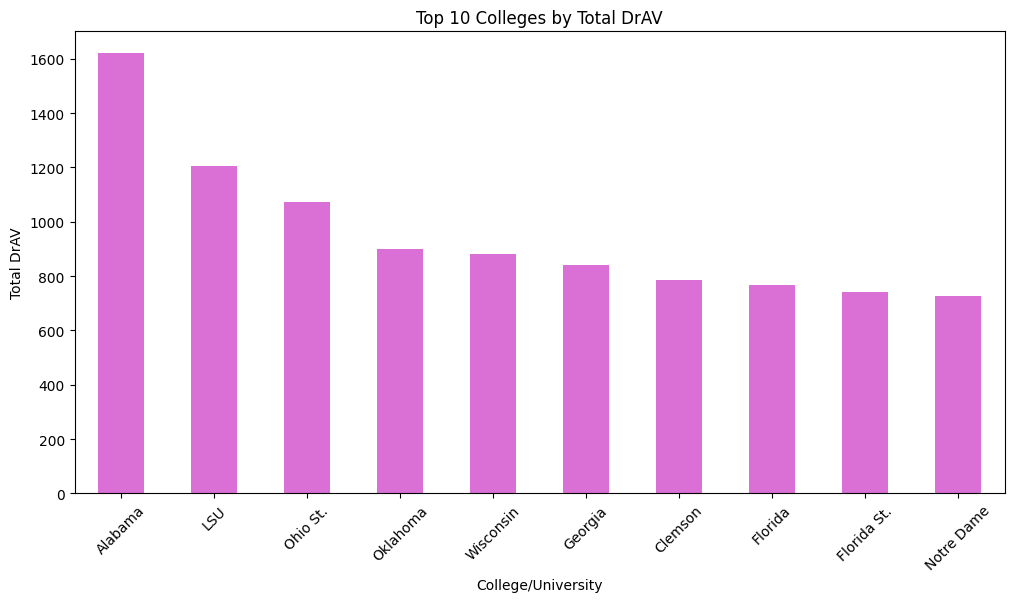

In [ ]:
# DrAV by College
drav_by_college = draft_py_use.groupby('College/Univ')['DrAV'].sum().sort_values(ascending=False)

print(drav_by_college.head(10))

plt.figure(figsize=(12, 6))
drav_by_college.head(10).plot(kind='bar', color='orchid')
plt.title("Top 10 Colleges by Total DrAV")
plt.xlabel("College/University")
plt.ylabel("Total DrAV")
plt.xticks(rotation=45)
plt.show()

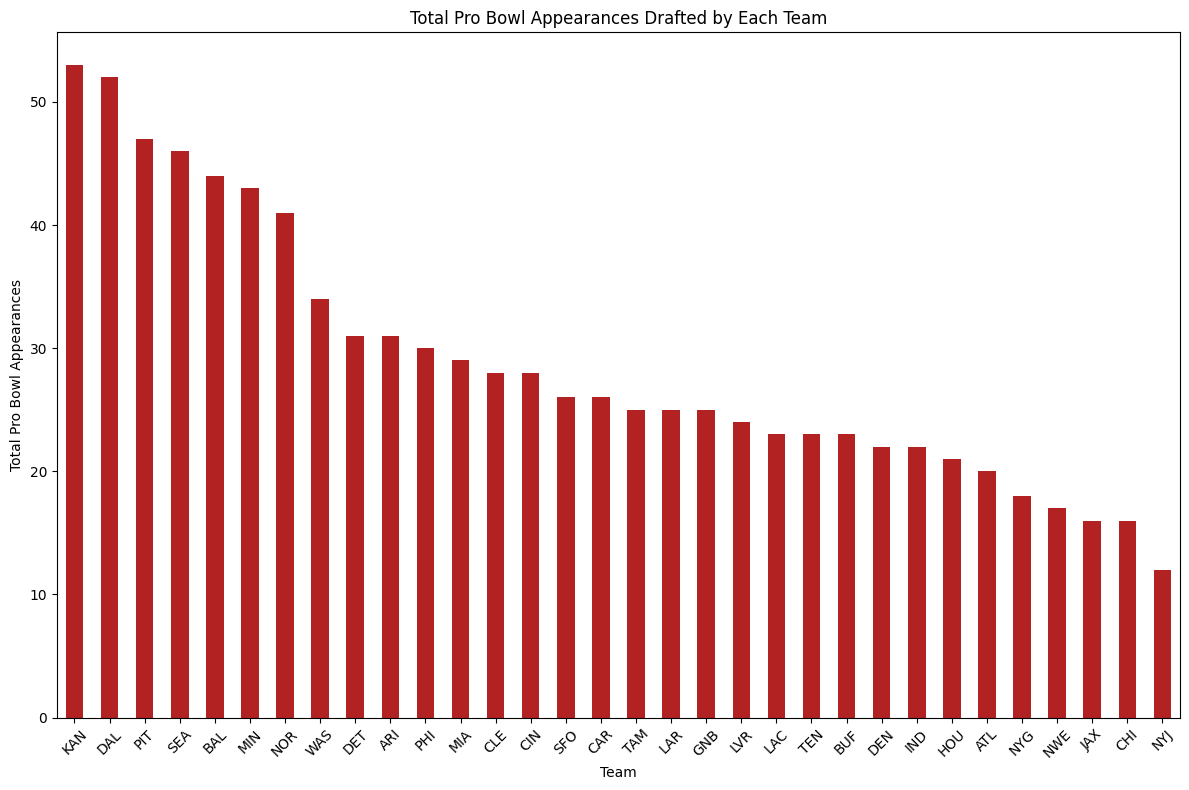

In [ ]:
pb_by_team = draft_py_use.groupby('Tm')['PB'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
pb_by_team.plot(kind='bar', color='firebrick')
plt.title('Total Pro Bowl Appearances Drafted by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Pro Bowl Appearances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Part 3: Predictive Modeling**

In [ ]:
# Pro Bowls for each pick position
draft_py_pb = draft_py_use.groupby(
    ['Pick']).agg({'PB':['mean']})

# fix column names
draft_py_pb.columns = list(
    map("_".join, draft_py_pb.columns)
)
draft_py_pb.reset_index(inplace = True)


# create our rolling average
draft_py_pb['roll_pb'] = (
    draft_py_pb['PB_mean'].rolling(
        window = 13, min_periods = 1, center = True
    ).mean()
)

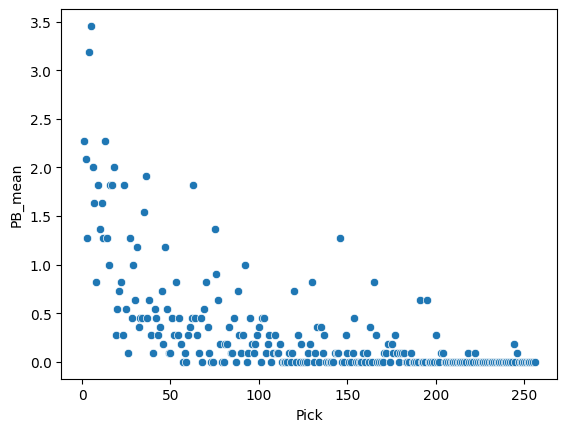

In [ ]:
# create scatterplot
sns.scatterplot(
    draft_py_pb,
    x = 'Pick',
    y = 'PB_mean'
)

plt.show();

Linear Regression Model

In [ ]:
# add regression
draft_py_pb['roll_PB_log'] = np.log(draft_py_pb['roll_pb'] +1)

# regression line
PB_pick_fit_py = smf.ols(
    formula = 'roll_PB_log ~ Pick',
    data = draft_py_pb
).fit()

PB_pick_fit_py.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            roll_PB_log   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     629.8
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           9.98e-71
Time:                        18:24:22   Log-Likelihood:                 135.23
No. Observations:                 256   AIC:                            -266.5
Df Residuals:                     254   BIC:                            -259.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6315      0.018     35.164      0.000       0.596       0.667
Pick          -0.0030      0.000    -25.096      0.000      -0.003      -0.003
==============================================================================
Omnibus:                       80.066   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.452
Skew:                           1.486   Prob(JB):                     1.97e-41
Kurtosis:                       5.957   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
features = draft_py_pb[['Pick']]
target = draft_py_pb['roll_PB_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
R-squared: 0.77


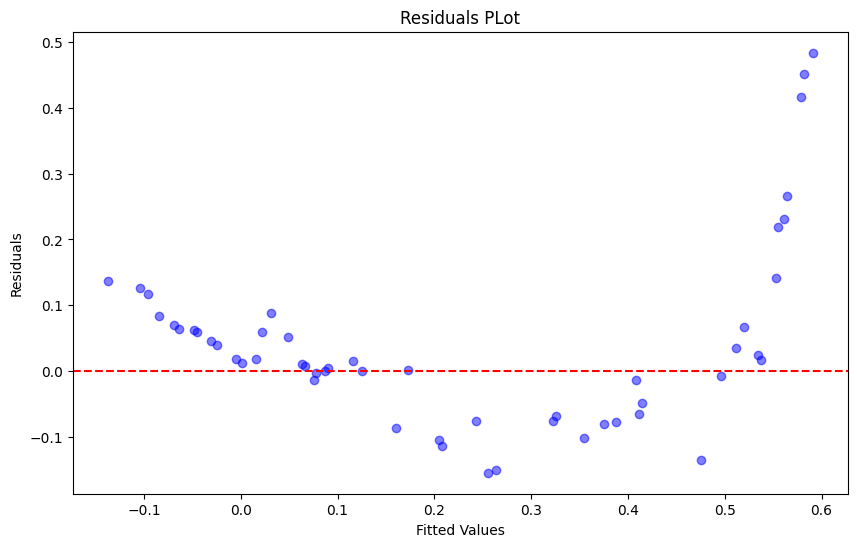

In [ ]:
# Look at residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals PLot")
plt.show()

- Curve & almost a slight U-shaped pattern, so I want to see how a Random Forest Model would hold up

Random Forest Model

In [ ]:
## Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


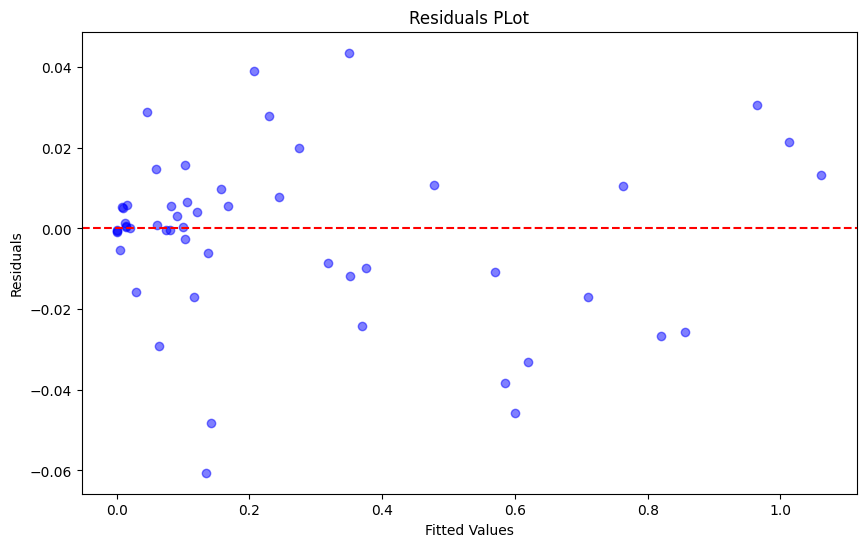

In [ ]:
# Look at residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals PLot")
plt.show()

Better looking residual plot than the Linear Regression residuals

##**Part 4: Analysis & Discussion**

I was interested to look at a wide-range of different aspects of the data set that the Pro Football Reference Draft Pages provide us. Since we looked at DrAV in our class exampl of web scraping, I decided to hone in on Pro Bowl appearances as my main target for player value.

Some of my takeaways from my EDA and my Modeling:

- Alabama has unquestionably been the best school in producing high-end draft picks, but also players who have productive careers too
- 1st Round picks overwhelmingly produce the most pro bowl appearances, as common theory would also suggest
- Not a huge disparity in Pro Bowl's in the 4th round - 6th round range
- Despite being neck-and-neck with the Chiefs in Pro Bowl Appearances drafted during the 2010's decade, the Cowboys have parlayed that success drafting to very little playoff success, as opposed to the Chiefs who have used their strong drafting to 3 Super Bowls in the last 4 years
- While my Linear Regression model wasn't bad, the added complexities of the Random Forest Model allowed for a better model and better accuracy